In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [39]:
print(os.getcwd())

/home/misc/kyoo/notebook/ML_Team/Final_Project


In [40]:
d = pd.read_csv("./asos_routine.csv")

In [41]:
d

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,OMA,2021-11-01 00:52,-95.8992,41.3103,295.67,42.10,27.00,54.78,37.69,6.90,30.31,1027.20,0.00,10.00,CLR,M,M,M,M,M
1,VTN,2021-11-01 00:52,-100.5489,42.8567,789.24,39.90,24.10,52.88,37.72,3.45,30.31,1028.40,0.00,10.00,OVC,M,M,8000.00,M,M
2,ODX,2021-11-01 00:53,-98.9517,41.6236,628.41,39.90,28.00,62.15,36.65,4.60,30.31,1028.10,0.00,10.00,OVC,M,M,8000.00,M,M
3,SNY,2021-11-01 00:53,-102.9847,41.1014,1303.84,33.10,30.90,91.51,23.40,13.80,30.24,1026.00,0.00,9.00,FEW,OVC,M,700.00,1200.00,M
4,BFF,2021-11-01 00:53,-103.5956,41.8740,1203.49,34.00,M,M,M,12.65,30.27,1026.80,T,4.00,BKN,OVC,M,700.00,1500.00,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372212,AUH,2022-10-31 23:55,-97.9946,40.8941,546.41,62.10,32.00,32.13,62.10,9.20,29.88,M,0.00,10.00,CLR,M,M,M,M,M
372213,TIF,2022-10-31 23:55,-100.5690,41.9622,887.30,59.20,19.00,20.75,59.20,6.90,29.86,M,0.00,10.00,CLR,M,M,M,M,M
372214,OFK,2022-10-31 23:56,-97.4351,41.9855,467.52,59.00,30.90,34.31,59.00,9.20,29.84,1011.00,0.00,10.00,CLR,M,M,M,M,M
372215,OLU,2022-10-31 23:56,-97.3426,41.4480,438.39,61.00,28.90,29.45,61.00,8.05,29.87,1012.30,0.00,10.00,CLR,M,M,M,M,M


In [42]:
d_sorted = d.sort_values(['station', 'valid'])
d_sorted

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
41,1BW,2021-11-01 00:58,-103.9950,41.5117,1602.91,31.50,30.00,94.10,23.50,9.20,30.22,1026.30,0.00,0.50,OVC,M,M,200.00,M,M
82,1BW,2021-11-01 01:58,-103.9950,41.5117,1602.91,31.60,30.20,94.49,23.02,10.35,30.23,1026.60,0.00,1.12,OVC,M,M,200.00,M,M
125,1BW,2021-11-01 02:58,-103.9950,41.5117,1602.91,31.10,29.70,94.47,21.33,12.65,30.22,1026.30,0.00,1.38,OVC,M,M,200.00,M,M
166,1BW,2021-11-01 03:58,-103.9950,41.5117,1602.91,30.90,29.50,94.47,22.15,10.35,30.22,1026.30,0.00,0.12,VV,M,M,200.00,M,M
206,1BW,2021-11-01 04:58,-103.9950,41.5117,1602.91,30.20,28.90,94.84,21.28,10.35,30.22,1026.30,0.00,1.62,OVC,M,M,200.00,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371997,VTN,2022-10-31 19:52,-100.5489,42.8567,789.24,69.10,19.00,14.67,69.10,6.90,29.82,1010.40,0.00,10.00,CLR,M,M,M,M,M
372041,VTN,2022-10-31 20:52,-100.5489,42.8567,789.24,72.00,18.00,12.74,72.00,12.65,29.80,1009.50,0.00,10.00,CLR,M,M,M,M,M
372086,VTN,2022-10-31 21:52,-100.5489,42.8567,789.24,71.10,17.10,12.63,71.10,13.80,29.81,1009.90,0.00,10.00,CLR,M,M,M,M,M
372129,VTN,2022-10-31 22:52,-100.5489,42.8567,789.24,68.00,18.00,14.60,68.00,10.35,29.81,1010.40,0.00,10.00,CLR,M,M,M,M,M


In [43]:
d_sorted.dtypes

station       object
valid         object
lon          float64
lat          float64
elevation    float64
tmpf          object
dwpf          object
relh          object
feel          object
sped          object
alti          object
mslp          object
p01m          object
vsby          object
skyc1         object
skyc2         object
skyc3         object
skyl1         object
skyl2         object
skyl3         object
dtype: object

In [44]:
d_filtered = d_sorted[d_sorted['valid'].str.contains(r'2022-03|2022-04|2022-05')]
d_filtered

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
122636,1BW,2022-03-01 00:58,-103.9950,41.5117,1602.91,45.70,21.60,38.10,39.78,12.65,30.10,1019.80,0.00,10.00,CLR,M,M,M,M,M
122679,1BW,2022-03-01 01:58,-103.9950,41.5117,1602.91,40.30,22.10,47.87,32.96,12.65,30.10,1020.90,0.00,10.00,CLR,M,M,M,M,M
122723,1BW,2022-03-01 02:58,-103.9950,41.5117,1602.91,45.10,20.50,37.20,36.54,23.00,30.09,1018.90,0.00,10.00,CLR,M,M,M,M,M
122765,1BW,2022-03-01 03:58,-103.9950,41.5117,1602.91,42.10,20.70,42.08,33.04,20.70,30.10,1018.70,0.00,10.00,CLR,M,M,M,M,M
122808,1BW,2022-03-01 04:58,-103.9950,41.5117,1602.91,41.70,19.80,41.13,32.26,21.85,30.11,1018.60,0.00,10.00,CLR,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215245,VTN,2022-05-31 19:52,-100.5489,42.8567,789.24,63.00,48.00,57.99,63.00,17.25,30.02,1015.90,0.00,10.00,FEW,OVC,M,3500.00,4600.00,M
215289,VTN,2022-05-31 20:52,-100.5489,42.8567,789.24,64.00,46.90,53.72,64.00,14.95,30.04,1016.70,0.00,10.00,BKN,OVC,M,4700.00,5500.00,M
215331,VTN,2022-05-31 21:52,-100.5489,42.8567,789.24,62.10,45.00,53.45,62.10,16.10,30.07,1017.80,0.00,10.00,FEW,OVC,M,3700.00,5000.00,M
215374,VTN,2022-05-31 22:52,-100.5489,42.8567,789.24,61.00,45.00,55.57,61.00,12.65,30.10,1018.70,0.00,10.00,OVC,M,M,5000.00,M,M


In [45]:
d_filtered['tmpf'] = pd.to_numeric(d_filtered['tmpf'], errors='coerce')
d_filtered['dwpf'] = pd.to_numeric(d_filtered['dwpf'], errors='coerce')
d_filtered['relh'] = pd.to_numeric(d_filtered['relh'], errors='coerce')
d_filtered['feel'] = pd.to_numeric(d_filtered['feel'], errors='coerce')
d_filtered['sped'] = pd.to_numeric(d_filtered['sped'], errors='coerce')
d_filtered['alti'] = pd.to_numeric(d_filtered['alti'], errors='coerce')
d_filtered['mslp'] = pd.to_numeric(d_filtered['mslp'], errors='coerce')
d_filtered['p01m'] = pd.to_numeric(d_filtered['p01m'], errors='coerce')
d_filtered['vsby'] = pd.to_numeric(d_filtered['vsby'], errors='coerce')
d_filtered.dtypes

/tmp/ipykernel_19038/1654402992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_filtered['tmpf'] = pd.to_numeric(d_filtered['tmpf'], errors='coerce')
/tmp/ipykernel_19038/1654402992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_filtered['dwpf'] = pd.to_numeric(d_filtered['dwpf'], errors='coerce')
/tmp/ipykernel_19038/1654402992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

station       object
valid         object
lon          float64
lat          float64
elevation    float64
tmpf         float64
dwpf         float64
relh         float64
feel         float64
sped         float64
alti         float64
mslp         float64
p01m         float64
vsby         float64
skyc1         object
skyc2         object
skyc3         object
skyl1         object
skyl2         object
skyl3         object
dtype: object

In [46]:
d_filtered.describe().apply(lambda x: round(x, 2))

,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,mslp,p01m,vsby
count,92865.00,92865.00,92865.00,92667.00,92611.00,92602.00,92053.00,91484.00,92699.00,49977.00,90149.00,92610.00
mean,-99.16,41.34,704.67,48.84,31.80,56.96,45.08,12.75,29.91,1013.06,0.07,9.57
std,2.65,0.72,356.91,16.96,15.16,22.72,20.52,7.93,0.24,8.92,0.58,1.58
min,-104.00,40.08,295.67,-17.70,-48.60,5.02,-43.65,0.00,29.08,982.60,0.00,0.12
25%,-101.62,40.83,396.51,37.00,21.00,38.02,29.65,6.90,29.78,1007.80,0.00,10.00
50%,-98.69,41.24,616.83,48.40,30.20,56.84,44.44,11.50,29.94,1013.90,0.00,10.00
75%,-96.75,41.76,992.28,60.10,42.80,75.94,60.30,17.25,30.07,1018.90,0.00,10.00
max,-95.59,42.86,1602.91,100.00,76.50,100.00,102.32,49.45,30.46,1032.10,35.81,10.00


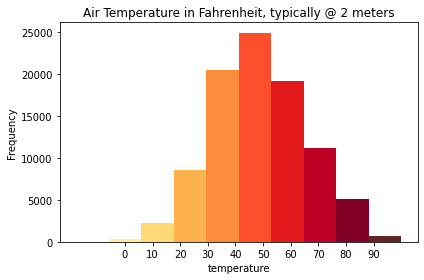

In [47]:
data = d_filtered['tmpf']
colors = ['#ffffcc', '#ffeda0', '#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', '#800026', '#602525']
n, bins, patches = plt.hist(data, bins=len(colors))

for c, p in zip(colors, patches):
    p.set_facecolor(c)
    
plt.title('Air Temperature in Fahrenheit, typically @ 2 meters')
plt.xlabel('temperature')
plt.xticks(np.arange(0, 100, step=10))
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Precipitation')]

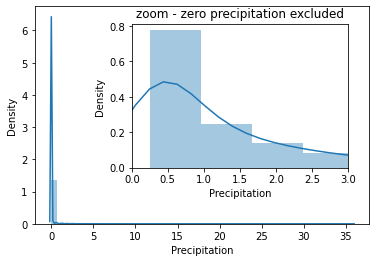

In [48]:
precip_no_z = d_filtered.loc[d_filtered['p01m'] != 0, :]

fig, ax = plt.subplots()

sns.distplot(d_filtered['p01m'], kde=True, ax=ax)

ax2 = plt.axes([0.35, 0.32, 0.5, 0.5], facecolor='w')
sns.distplot(precip_no_z['p01m'], kde=True, ax=ax2)
ax2.set_title('zoom - zero precipitation excluded')
ax2.set_xlim([0,3.0])
ax.set(xlabel='Precipitation')
ax2.set(xlabel='Precipitation')

In [49]:
def mon_to_mon(k):
    if(k == d_filtered['valid'].str.contains('2022-03')):
        k = "March"
    elif(k == d_filtered['valid'].str.contains('2022-04')):
        k = "April"
    elif(k == d_filtered['valid'].str.contains('2022-05')):
        k = "May"
    return k
    

In [50]:
print(d_filtered['valid'].str.contains('2022-03'))

122636     True
122679     True
122723     True
122765     True
122808     True
          ...  
215245    False
215289    False
215331    False
215374    False
215418    False
Name: valid, Length: 92865, dtype: bool


In [61]:
from os import walk
from os import listdir
from os.path import isfile, join
mypath="/home/misc/kyoo/notebook/ML_Team/Final_Project"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    print(f)
    break

['asos_routine.csv', 'Census_Tracts_2010.dbf', 'project_eda_cleaning.ipynb', 'Census_Tracts_2010.prj', 'Census_Tracts_2010.shx', 'Census_Tracts_2010.shp', 'Census_Tracts_2010.cpg', 'Census_Tracts_2010.xml']


In [62]:
ne_co = gpd.read_file("./Census_Tracts_2010.shp")
ne_co

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GDB_GEOMAT,Shape__Are,Shape__Len,geometry
0,1,31,003,979600,31003979600,9796,Census Tract 9796,G5020,S,1260032868,1750790,+42.2882307,-098.0387806,None,1.357495e+10,561923.176837,"POLYGON ((-97.89937 42.07787, -97.90027 42.077..."
1,2,31,003,979800,31003979800,9798,Census Tract 9798,G5020,S,935263506,1613507,+42.0382426,-098.0944284,None,1.007840e+10,519809.462177,"POLYGON ((-97.83407 42.03487, -97.83406 42.034..."
2,3,31,003,979700,31003979700,9797,Census Tract 9797,G5020,S,24887556,194166,+42.1300843,-098.0225121,None,2.698240e+08,127536.649645,"POLYGON ((-98.04676 42.09309, -98.04676 42.096..."
3,4,31,021,963300,31021963300,9633,Census Tract 9633,G5020,S,484332197,5394974,+41.7931915,-096.2078305,None,5.267902e+09,336792.815662,"POLYGON ((-96.12164 41.68959, -96.12186 41.689..."
4,5,31,021,963200,31021963200,9632,Census Tract 9632,G5020,S,348549904,1121649,+41.7937633,-096.4350555,None,3.761346e+09,303748.961403,"POLYGON ((-96.55519 41.78311, -96.55519 41.783..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,528,31,019,969400,31019969400,9694,Census Tract 9694,G5020,S,2443178,0,+40.7063138,-099.0732623,None,2.628518e+07,23867.098970,"POLYGON ((-99.06953 40.69782, -99.07230 40.697..."
528,529,31,019,969500,31019969500,9695,Census Tract 9695,G5020,S,1651430,0,+40.6984006,-099.0830658,None,1.776708e+07,17840.207721,"POLYGON ((-99.07761 40.69757, -99.07764 40.696..."
529,530,31,019,969600,31019969600,9696,Census Tract 9696,G5020,S,3221398,0,+40.6978433,-099.1052820,None,3.465783e+07,28441.612791,"POLYGON ((-99.09781 40.69349, -99.09875 40.693..."
530,531,31,019,969204,31019969204,9692.04,Census Tract 9692.04,G5020,S,35440844,221293,+40.7221583,-099.1284754,None,3.836717e+08,106978.179844,"POLYGON ((-99.11509 40.71389, -99.11593 40.713..."


In [80]:
gdf = gpd.GeoDataFrame(
    d_filtered, geometry=gpd.points_from_xy(d_filtered.lon, d_filtered.lat))

<AxesSubplot:>

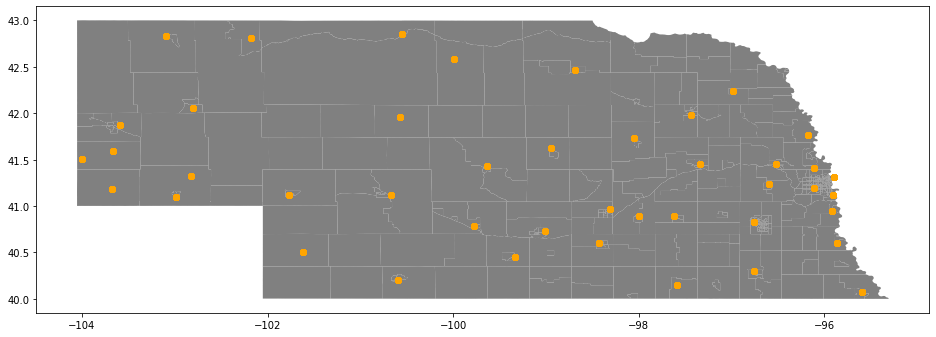

In [83]:
#stations

fig,ax = plt.subplots(figsize=(16, 8))

ne_co.plot(ax=ax, color = 'gray')
gdf.plot(ax=ax, color = 'orange')
